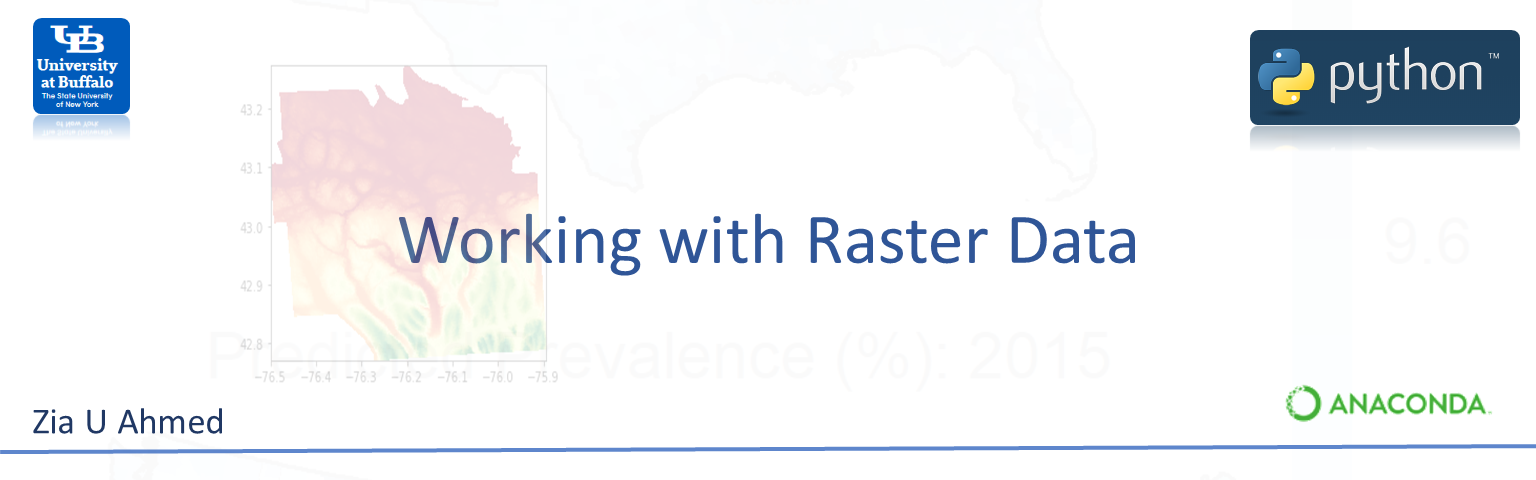

# Raster Data

Unlike vector data, a raster data consists of cells or pixels organized into rows and columns as a matrix where each cell contains a value representing geographical feature on the earth. The size of the area on the surface that each pixel covers is known as the spatial resolution of the image. For instance, an image that has a 1 m spatial resolution means that each pixel in the image represents a 1 m x 1 m area. There are two types of raster data: continuous and discrete.  An example of discrete raster data is Land use raster.  Data types are flexible, including discrete and categorical data, such as soil or land-use maps, or continuous data as in digital elevation models, precipitation gradient maps, or pollutant concentration maps, etc. 

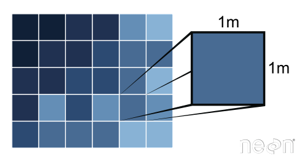

Generally, two types of raster use in GIS and remote sensing application:  **a single band**, or layer measure of a single characteristic of spatial area and **multiple bands** raster contains multiple spatially corresponding matrices of cell values representing the same spatial area.  An example of a single-band raster data set is a digital elevation model (DEM). Each cell in a DEM contains only one value representing elevation of earth surface. Most satellite imagery has multiple bands, typically containing values within band of the electromagnetic spectrum.

In this exercise, we will use SRTM 90 Digital Elevation Model of Onondaga County, New York State which was downloaded from [CGIAR-CSI](http://www.cgiar-csi.org/data/srtm-90m-digital-elevation-database-v4-1).  

This exercise will cover following raster processing in python:

    
* [Read and Write Raster Data](#Read-and-Write-Raster-Data)


* [Working with Multi Band Raster](#Working-with-Multi-Band-Raster)
   
    
 * [Raster Pojection](#Raster-Pojection)
 
 
 * [Clipping](#Clipping)
 
    - [Single Band Raster](#Single-Band-Raster)
    
    - [Multi-Band Raster](#Multi-Band-Raster)
   
      
 * [Raster Mosaic](#Raster-Mosaic)
      
  
 * [Re-classification](#Re-classification)
      
  
 * [Zonal Statistics](#Zonal-Satatistics)
      
  
 * [Resampling](#Resampling)
      
     - [Upsampling](#Upsampling)
      
     - [Aggregation or Downsampling](#Aggregation-or-Downsampling)
      
   
 * [Raster Algebra](#Raster-Algebra)
      
  
 * [Raster Stack](#Raster-Stack)
 
 
 * [Rasterization](#Rasterization)
 
    - [Convert Polygon to Raster](#Convert-Polygon-to-Raster)
 
    - [Convert Point Data to Raster](#Convert-Point-Data-to-Raster)


* [Convert Raster to Point Data](#Convert-Raster-to-Point-Data)


* [Extract Raster Values to Sampling Points](#Extract-Raster-Values-to-Sampling-Points)

    - [Extract Single Band Raster](#Extract-Single-Band-Raster)
    
    - [Extract Multi-band raster (raster stack)](#Extract-Multi-band-raster-(raster-stack))
    
    
* [Extract Multi-band raster (raster stack) to Grid Locations](#Extract-Multi-band-raster-(raster-stack)-to-Grid-Locations)


The data set use in this exercise could be found [here](https://www.dropbox.com/s/uz9dcqm80rewpln/Data_06.7z?dl=0).  

* 90 m SRTM DEM of Onondaga county, New York State  
* Landsat8 multibands Images
* DEM for 4 Great Plain States
* A Spatial Point Data frame 

###  Set working directory

In [1]:
import os
path= "E:/GitHub/geospatial-python-github.io/Lesson_06_working_with_raster_data/"
os.chdir(path)
print("Current Working Directory " , os.getcwd())

### Load Library

In [1]:
%matplotlib inline

import sys
from glob import glob
from osgeo import ogr, gdal
from osgeo import gdalconst
import subprocess

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

import seaborn as sns

import geopandas as gpd
import pycrs
import fiona
from fiona.crs import from_epsg
from shapely.geometry import box
from shapely.geometry import Point
import shapely.geometry as geoms

import rasterio as rio
from rasterio.plot import show
import rasterio.warp
import rasterio.shutil
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import plotting_extent
from rasterio.plot import show_hist
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio import Affine, MemoryFile
from rasterio.enums import Resampling
from rasterio import plot

import rasterstats as rs
import georasters as gr
from rastertodataframe import raster_to_dataframe

import earthpy.spatial as es
import earthpy.plot as ep
import earthpy as et

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate


C:\anaconda3\envs\tensorflow\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\anaconda3\envs\tensorflow\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [3]:
print(f"Python {sys.version}")
print(f"geopandas {gpd.__version__}")
print(f"osgeo {gdal.__version__}")
print(f"rasterio {rio.__version__}")

Python 3.7.6 | packaged by conda-forge | (default, Jan  7 2020, 21:48:41) [MSC v.1916 64 bit (AMD64)]
geopandas 0.6.2
osgeo 3.0.2
rasterio 1.1.2


###  Setting consistent plotting style throughout notebook

In [4]:
sns.set_style("white")
sns.set(font_scale=1.5)

# Read and Write Raster Data

In this exercise, we will use SRTM 90 Digital Elevation Model of Onondaga County, New York State which was downloaded from [CGIAR-CSI](http://www.cgiar-csi.org/data/srtm-90m-digital-elevation-database-v4-1). We will use  **rasterio** package to open and visualization raster in Python. 

###  Open With Rasterio

In [5]:
dem_path = "Data_06/RASTER/DEM/Onondaga_DEM.tif"
dem=rio.open(dem_path)

### Read raster file properties

#### Pojection

In [6]:
dem.crs

CRS.from_epsg(4326)

#### Raster width

In [7]:
dem.width

534

####  Raster hieight

In [8]:
# raster column
dem.height

443

#### Number of raster bands

In [9]:
dem.count

1

#### Data type of the values

In [10]:
type(dem)

rasterio.io.DatasetReader

#### Raster Meta-data

In [11]:
DEM_meta=dem.meta
print(DEM_meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 534, 'height': 443, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0011330640324679006, 0.0, -76.50012580544984,
       0.0, -0.00113306403246791, 43.27333404698799)}


#### Simple raster plot 

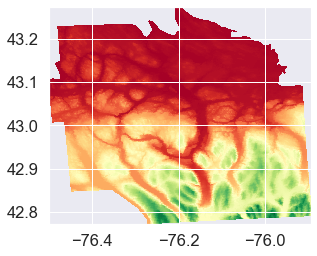

In [12]:
show(dem,cmap='RdYlGn')

#### Raster Histogram

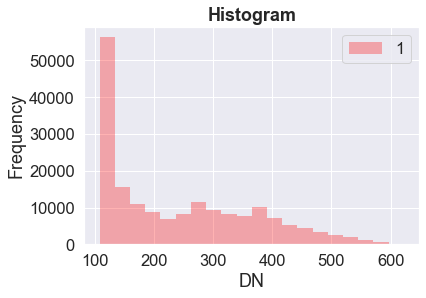

In [13]:
from rasterio.plot import show_hist
show_hist(dem, bins=20, lw=0.0, stacked=False, alpha=0.3,
        histtype='stepfilled', title="Histogram")

### Open with GDAL

You can also open a raster layer with **gdal.Open()**

In [14]:
raster = gdal.Open(dem_path)

#### Check type of the variable 'raster'

In [15]:
type(raster)

osgeo.gdal.Dataset

#### Raster properties

In [16]:
gt =raster.GetGeoTransform()
print (gt)

(-76.50012580544984, 0.0011330640324679006, 0.0, 43.27333404698799, 0.0, -0.00113306403246791)


#### Raster Resolution

In [17]:
pixelSizeX = gt[1]
pixelSizeY =-gt[5]
print (pixelSizeX)
print (pixelSizeY)

0.0011330640324679006
0.00113306403246791


#### Projection

In [18]:
raster.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

#### Plot raster

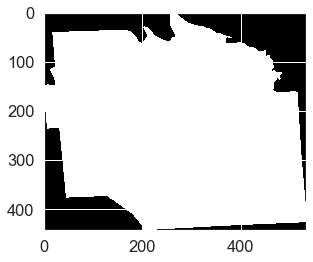

In [19]:
data = raster.GetRasterBand(1).ReadAsArray()
plt.imshow(data,cmap='gray')
plt.show()

## Write raster data

###  With Rasterio

We can export a raster file in python using the **rasterio write()** function. 

Use **rio.open()** to create a new blank raster ‘template’. Then write the DEM  numpy array to to that template using **dst.write()**.

In [20]:
outTIF= "Data_06/RASTER/DEM/Onondaga_DEM_NEW.tif"
dem_meta=dem.profile 
with rio.open(outTIF, 'w', **dem_meta) as dst:
    dst.write(dem.read(1), 1)

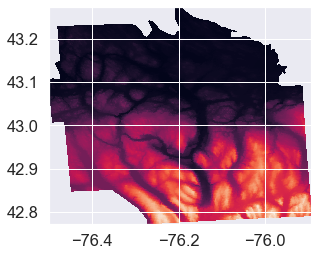

In [21]:
src = rio.open("Data_06/RASTER/DEM/Onondaga_DEM_NEW.tif")
show(src)

### Write with GDAL

Now I will show how to write raster with GDAL driver. We will use a method to save the data in a format provided by the user. 

In [22]:
g = gdal.Open ("Data_06/RASTER/DEM/Onondaga_DEM_NEW.tif" ) 

In [23]:
# Get the projection information
g.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [24]:
# Get the x, y and number of bands from the original file
x_size, y_size, n_bands = g.RasterXSize, g.RasterYSize, g.RasterCount
data = g.ReadAsArray ()
# Get a handler to a driver
driver = gdal.GetDriverByName ( "HFA" )
data

array([[-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       ...,
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, ..., -3.402823e+38,
        -3.402823e+38, -3.402823e+38]], dtype=float32)

In [25]:
# Next line creates the output dataset with
# 1. The filename ("Onondaga_DEM.img")
# 2. The raster size (x_size, y_size)
# 3. The number of bands
# 4.The data type (in this case, Byte.
#  Other typical values might be gdal.GDT_Int16 
#  or gdal.GDT_Float32)
dataset_out = driver.Create( "Data_06/RASTER/DEM/Onondaga_DEM_gdal.img", x_size, y_size, n_bands, \
                             gdal.GDT_Byte )

In [26]:
# Set the output geotransform by reading the input one
dataset_out.SetGeoTransform ( g.GetGeoTransform() )

# Set the output projection by reading the input one
dataset_out.SetProjection ( g.GetProjectionRef() )

# Now, get band # 1, and write our data array. 
# Note that the data array needs to have the same type
# as the one specified for dataset_out
dataset_out.GetRasterBand ( 1 ).WriteArray ( data )

# This bit forces GDAL to close the file and write to it
dataset_out = None

In [27]:
!gdalinfo "Data_06/RASTER/DEM/Onondaga_DEM_gdal.img"

Driver: HFA/Erdas Imagine Images (.img)
Files: Data_06/RASTER/DEM/Onondaga_DEM_gdal.img
Size is 534, 443
Coordinate System is:
BOUNDCRS[
    SOURCECRS[
        GEOGCRS["WGS 84",
            DATUM["World Geodetic System 1984",
                ELLIPSOID["WGS 84",6378137,298.257223563,
                    LENGTHUNIT["metre",1]]],
            PRIMEM["Greenwich",0,
                ANGLEUNIT["degree",0.0174532925199433]],
            CS[ellipsoidal,2],
                AXIS["geodetic latitude (Lat)",north,
                    ORDER[1],
                    ANGLEUNIT["degree",0.0174532925199433]],
                AXIS["geodetic longitude (Lon)",east,
                    ORDER[2],
                    ANGLEUNIT["degree",0.0174532925199433]],
            ID["EPSG",4326]]],
    TARGETCRS[
        GEOGCRS["WGS 84",
            DATUM["World Geodetic System 1984",
                ELLIPSOID["WGS 84",6378137,298.257223563,
                    LENGTHUNIT["metre",1]]],
            PRIMEM["Greenwich",0,
  

# Working with Multi Band Raster

For loading multi-bands image in Python, we will use a sub-set of Landsat 8 multispectral image covering Onondaga county of New York state. This image was downloaded from [USGS Earth Explore]( http://earthexplorer.usgs.gov/ ). 

#### Open individual bands (b2 to b4) one by one

In [28]:
b2="Data_06/RASTER/LC08_20150706_subset/LC08_L1TP_015030_20150716_20170226_01_T1_B2.TIF"
b3="Data_06/RASTER/LC08_20150706_subset/LC08_L1TP_015030_20150716_20170226_01_T1_B3.TIF"
b4="Data_06/RASTER/LC08_20150706_subset/LC08_L1TP_015030_20150716_20170226_01_T1_B4.TIF"
b5="Data_06/RASTER/LC08_20150706_subset/LC08_L1TP_015030_20150716_20170226_01_T1_B5.TIF"

b2_r=rio.open(b2)
b3_r=rio.open(b3)
b4_r=rio.open(b4)
b5_r=rio.open(b5)

#### Plot all four bands

Text(0.5, 1.0, 'Band-5')

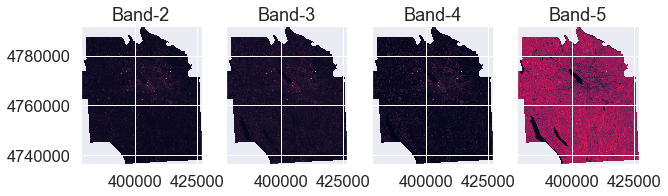

In [29]:
# Initialize subplots
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(10, 4), sharey=True)

# Plot 4 bands
show(b2_r, ax=ax1)
show(b3_r, ax=ax2)
show(b4_r, ax=ax3)
show(b5_r, ax=ax4)

# Add titles
ax1.set_title("Band-2")
ax2.set_title("Band-3")
ax3.set_title("Band-4")
ax4.set_title("Band-5")


## Stack Multi Band Imagery

Some remote sensing datasets are stored with each band in a separate file. However, often you want to use all of the bands together in your analysis. For example you need all of the bands together in the same file or “stack” in order to plot a color RGB image. EarthPy has a stack() function that allows you to take a set of .tif files that are all in the same spatial extent, CRS and resolution and either export them together a single stacked .tif file or work with them in Python directly as a stacked numpy array.

To begin using the EarthPy stack() function, import the needed packages and create an array to be plotted. Below you plot the data as continuous with a colorbar using the plot_bands() function.


We will use **es.stack()** function of **earthpy** library to  create a raster stack of multi-band raster. It need three steps:

1. Create a raster list using **glob()**  function
2. Create a path and define a name for mutli-band raster
2. Apply **es.stack()** to creat new stacked raster with all bands save as multi tif
3. Then apply **rio.open** to read the raster bands

#### Creat a Raster List

You will use the *glob* function see the files in landsat data directory

In [30]:
glob ("Data_06/RASTER/LC08_20150706_subset/*")

['Data_06/RASTER/LC08_20150706_subset\\landsat_multi.tif',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_ANG.txt',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B1.TIF',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B10.TIF',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B11.TIF',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B2.TIF',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B3.TIF',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B4.TIF',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B5.TIF',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B6.TIF',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B7.TIF',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP

Now we will create a list for band (2,3,4 and 5)

In [31]:
multi_bands=glob( "Data_06/RASTER/LC08_20150706_subset/*B[2:3:4:5]*.tif")
multi_bands

['Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B2.TIF',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B3.TIF',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B4.TIF',
 'Data_06/RASTER/LC08_20150706_subset\\LC08_L1TP_015030_20150716_20170226_01_T1_B5.TIF']

Now you have a list of all of the landsat bands in your landsat collections folder. You could chose to open each file individually using the **rio.open** (rasterio library) function.

Remember that Python uses 0 based indexing so band 3 is actually at index [2] not [3].

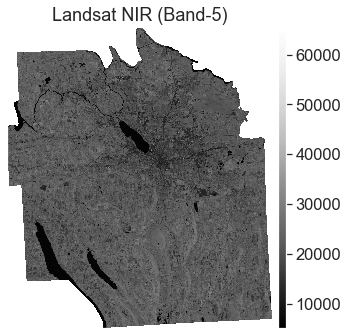

In [32]:
with rio.open(multi_bands[3]) as src:
    landsat_band4 = src.read()

ep.plot_bands(landsat_band4[0],
              title="Landsat NIR (Band-5)",
              scale=False, 
              figsize=(5, 6))
plt.show()

####  Create a path of mutli-band raster

In [33]:
landsat_multi_path = "Data_06/RASTER/LC08_20150706_subset/landsat_multi.tif"

#### Create stacked raster with all bands save as landsat_multi.tif

In [34]:
land_stack, land_meta = es.stack(multi_bands,
                                 landsat_multi_path)

#### Open  multi-band raster

Once we have stacked 4 bands, we can import it and work with it as we need to!

In [35]:
with rio.open(landsat_multi_path) as src:
    landsat_multi = src.read() 

#### Plot all bands using earthpy

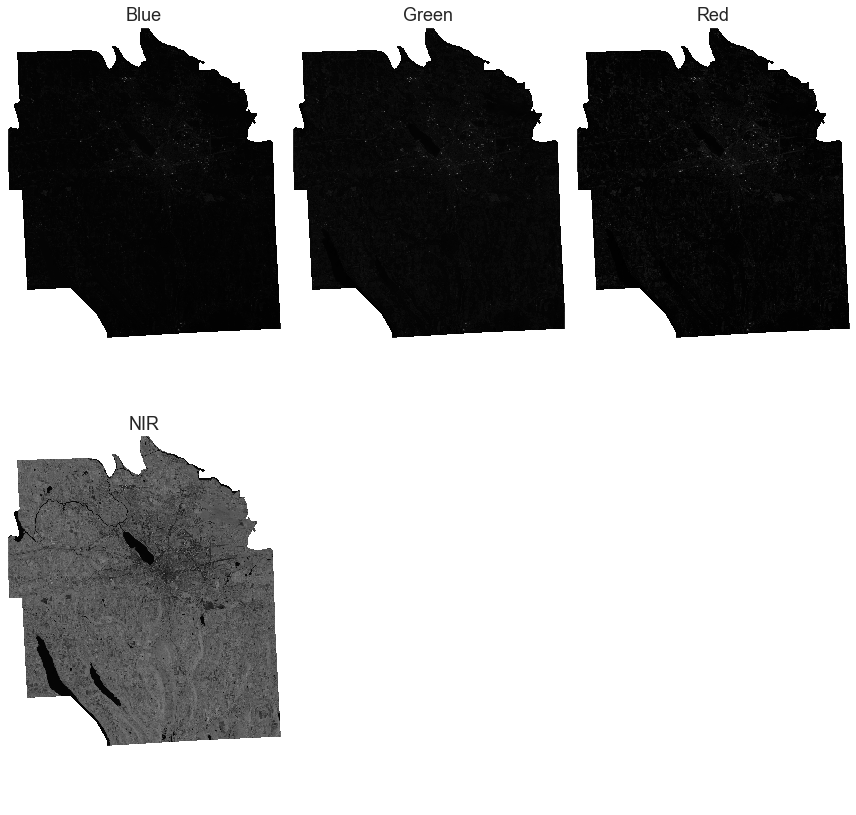

In [36]:
band_titles = ["Blue", "Green", "Red", "NIR"]
ep.plot_bands(landsat_multi,
              title=band_titles, cbar=False)
plt.show()

#### RGB Image


We can plot 3 band color composite images with Landsat bands. Below you will plot an RGB image using landsat. Refer to the landsat bands in the table at the top of this page to figure out the NR, Red and Blue

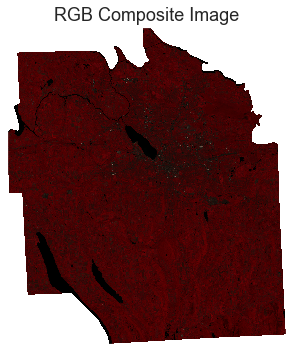

In [37]:
ep.plot_rgb(landsat_multi,
            rgb=[3, 2, 1],
            stretch=True,
            figsize=(5, 6),
            title="RGB Composite Image")
plt.show()


### Band Statistics

Now we will look at the values that are stored in the band. As the values of the bands are stored as numpy arrays, it is extremely easy to calculate basic statistics by using basic numpy functions.

In [38]:
# Open multiband-raster
fp = "Data_06/RASTER/LC08_20150706_subset/landsat_multi.tif"

# Open the file:
raster = rio.open(fp)

# Read all bands as np.array
array = raster.read()

# Calculate statistics for each band
stats = []

for band in array:
    stats.append({
          'min': band.min(),
          'mean': band.mean(),
          'median': np.median(band),
          'max': band.max()})
 

print(stats)

[{'min': 8274, 'mean': 22220.99397097726, 'median': 9292.0, 'max': 65536}, {'min': 7225, 'mean': 21835.481257056206, 'median': 8970.0, 'max': 65536}, {'min': 6328, 'mean': 20923.77444833283, 'median': 7657.0, 'max': 65536}, {'min': 5119, 'mean': 31291.389731789604, 'median': 22918.5, 'max': 65536}]


### Band Histogram

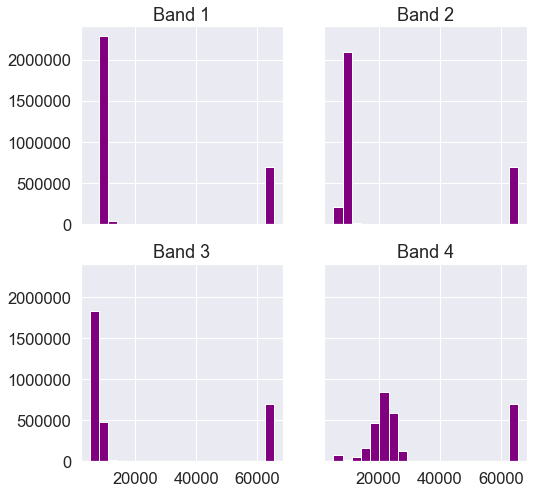

In [39]:
ep.hist(array, 
        figsize=(8,8),
        title=["Band 1", "Band 2", "Band 3", "Band 4"])
plt.show()

# Raster Pojection

This exercise you will learn raster projection and projection transformation of raster data.

We will use SRTM 90 digital Elevation Model New York State which was downloaded from CGIAR-CSI. We will re-project it from WSG84 coordinate to Albers Equal Area Conic NAD83 projection system. 

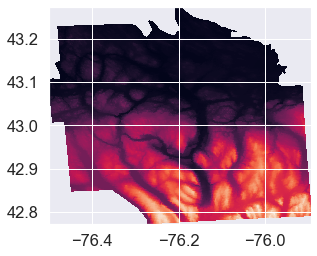

In [40]:
dem_path = "Data_06/RASTER/DEM/Onondaga_DEM.tif"
dem=rio.open(dem_path)
show(dem)

In [41]:
dem.crs

CRS.from_epsg(4326)

First, we will re-project one tile of DEM raster data from WGS 1984 CRS to Albers Equal Area Conic projection system. In Python, re-projection of raster little complicated. The code below reprojects between two arrays, using no pre-existing GIS datasets. The rasterio.warp.reproject() has two positional arguments: source and destination. The remaining keyword arguments parameterize the reprojection transform.

Reprojecting a GeoTIFF dataset from one coordinate reference system is a common use case. Rasterio provides a few utilities to make this even easier:

transform_bounds() transforms the bounding coordinates of the source raster to the target coordinate reference system, densifiying points along the edges to account for non-linear transformations of the edges.

calculate_default_transform() transforms bounds to target coordinate system, calculates resolution if not provided, and returns destination transform and dimensions.

In [42]:
inputTIF = 'Data_06/RASTER/DEM/Onondaga_DEM.tif'
projTIF = 'Data_06/RASTER/DEM/Onondaga_DEM_PROJ.tif'

# Define EPSG:5070 projection
dst_crs={'init': 'epsg:5070'}

with rio.open(inputTIF) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rio.open(projTIF, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)

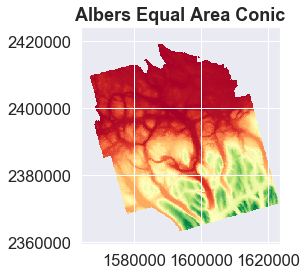

In [43]:
with rio.open(projTIF) as src:
    rasterio.plot.show(src, title='Albers Equal Area Conic', cmap='RdYlGn')

Below **reproject_et** function wrapps the **rasterio reproject** code with some addtional arguments that allow to define **input path, the output path, and the new CRS components**. These three argument only  need to change we are going to cahnge project other raster layers. [(Source)](https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/reproject-raster/)  

In [44]:
def reproject_et(inpath, outpath, new_crs):
    dst_crs = new_crs # CRS for web meractor 

    with rio.open(inpath) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rio.open(outpath, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)

In [45]:
reproject_et(inpath = 'Data_06/RASTER/DEM/Onondaga_DEM.tif', 
              outpath = 'Data_06/RASTER/DEM/Onondaga_DEM_PROJ_02.tif', 
              new_crs = "+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs")

In [46]:
# Check projection with GDAL
import gdal
!gdalinfo "Data_06/RASTER/DEM/Onondaga_DEM_PROJ_02.tif"

Driver: GTiff/GeoTIFF
Files: Data_06/RASTER/DEM/Onondaga_DEM_PROJ_02.tif
Size is 531, 623
Coordinate System is:
PROJCRS["unknown",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101004,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["unnamed",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",40,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8821]],
        PARAMETER["Longitude of false origin",-96,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8822]],
        PARAMETER["Latitude of 1st standard parallel",20,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard parallel",60,
            ANGLEUNIT["degree",0.01745

# Clipping

## Single Band Raster

We will clip DEM with extent of CO state shape file. Before clipping, you have to make sure both raster and vector data are in same projection system. After spending 7-8 hours, follwing approch from  [here](https://automating-gis-processes.github.io/CSC/notebooks/L5/clipping-raster.html#) can clip a raster successfully.

In [47]:
# Load DEM
dem_path = "Data_06/RASTER/DEM/DEM.tif"
GP_DEM=rio.open(dem_path)

In [48]:
# Load CO state boundary file
fp_co="Data_06/CO_STATE_BD.shp"
CO_BD= gpd.GeoDataFrame.from_file(fp_co)

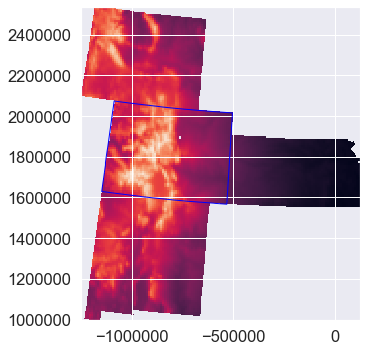

In [49]:
# Plot them
fig, ax = plt.subplots(figsize=(5, 15))
rasterio.plot.show(GP_DEM, ax=ax)
CO_BD.plot(ax=ax, facecolor='none', edgecolor='blue')

Before clipping, weneed to get the coordinates of the geometry in **JESON** format. This can be done  with following function:

In [50]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

Get the geometry coordinates by using the function.

In [51]:
coords = getFeatures(CO_BD)
# print(coords)

Now we are ready to clip the raster with the polygon using the **coords** variable that we just created. Clipping the raster can be done easily with the **mask** function that we imported in the beginning from rasterio, and specifying **clip=True**.

In [52]:
# Clip the raster with Polygon
out_img, out_transform = mask(dataset=GP_DEM, shapes=coords, crop=True)

Next, we need to modify the metadata. Let’s start by copying the metadata from the original data file.

In [53]:
# Copy the metadata
out_meta = GP_DEM.meta.copy()
print(out_meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 274, 'height': 308, 'count': 1, 'crs': CRS.from_wkt('PROJCS["Albers_Conical_Equal_Area",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(5000.0, 0.0, -1250354.7984626968,
       0.0, -5000.0, 2536812.7705312967)}


In [54]:
# Define EPSG:5070 projection
new_crs={'init': 'epsg:5070'}

Now we need to update the metadata with new dimensions, transform (affine) and CRS (as Proj4 text):

In [55]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": new_crs}
                         )

Finally, we can save the clipped raster to disk with following command:

In [56]:
out_tif =("Data_06/RASTER/DEM/CO_DEM.tif")
          
with rasterio.open(out_tif, "w", **out_meta) as dest:
        dest.write(out_img)

We can use GDAL in order to re-open the file and read it in as a 2D array. Additionally, it is important to note that our DEM file has NaN values which will later cause Matplotlib to fail. Therefore, we’ll also mask these values out so that Matplotlib will be unaware of them and use **imshow()** function to create a plot with colorbar. 

In [2]:
filename = "Data_06/RASTER/DEM/CO_DEM.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan
    data_array[data_array == nodataval] = np.nan


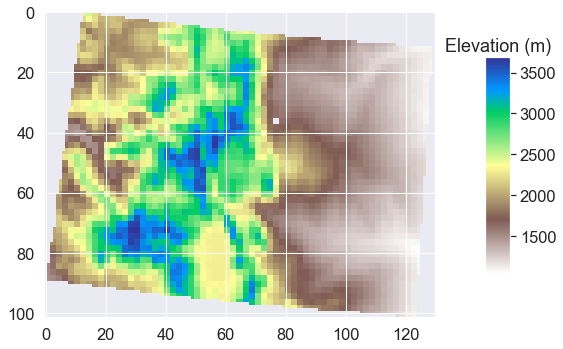

In [58]:
%matplotlib inline
fig = plt.figure(figsize = (7,6))

plt.imshow(data_array, cmap='terrain_r')
plt.colorbar(cax = fig.add_axes([1, 0.25, 0.05, 0.5]))
plt.title("Elevation (m)")

plt.show()


#### Contour plot

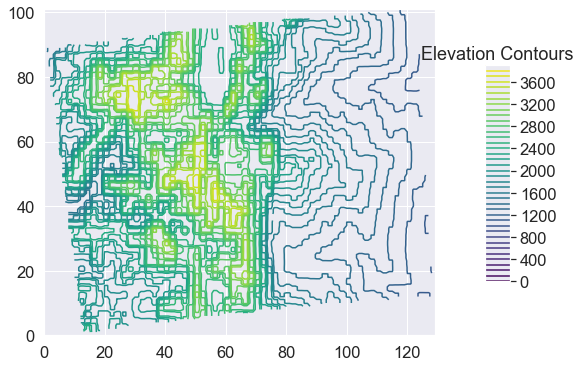

In [59]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (7,6))

plt.contour(data_array, cmap = "viridis",
            levels = list(range(0, 4000, 100)))
plt.colorbar(cax = fig.add_axes([1, 0.25, 0.05, 0.5]))
plt.title("Elevation Contours")
plt.show()


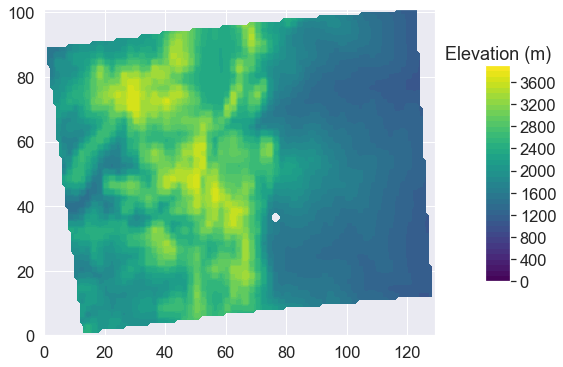

In [60]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (7, 6))

plt.contourf(data_array, cmap = "viridis",
            levels = list(range(0, 4000,100)))

plt.colorbar(cax = fig.add_axes([1, 0.25, 0.05, 0.5]))
plt.title("Elevation (m)")

#plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Multi-Band Raster

#### Load multi-tif (4-bands raster)

In [61]:
stack_band_paths = glob( "Data_06/RASTER/LC08_20150706_subset/*B[2:3:4:5]*.tif")
stack_band_paths.sort()

# Create output directory and the output path
output_dir ="Data_06/RASTER/LC08_20150706_subset_clip/"

raster_out_path = os.path.join(output_dir, "raster.tiff")

In [62]:
array, raster_prof = es.stack(stack_band_paths, out_path=raster_out_path)

In [63]:
extent = plotting_extent(array[0], raster_prof["transform"])

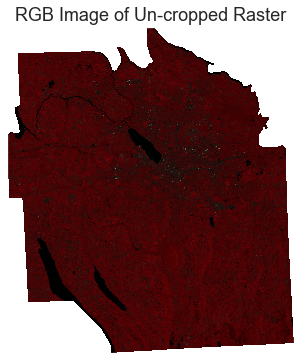

In [64]:
fig, ax = plt.subplots(figsize=(6, 6))
ep.plot_rgb(
    array,
    ax=ax,
    rgb=[3, 2, 1],
    stretch=True,
    extent=extent,
    str_clip=0.5,
    title="RGB Image of Un-cropped Raster",
)
plt.show()

####  Open the AOI boundary using GeoPandas.

In [65]:
aoi = gpd.read_file('Data_06\AOI.shp')

#### Reproject the AOI

The crop function won’t work properly if the data are in different Coordinate Reference Systems (CRS). To fix this, be sure to reproject the crop layer to match the CRS of your raster data. To reproject your data, first get the CRS of the raster from the rasterio profile object. Then use that to reproject using geopandas .to_crs method.

In [66]:
# Check current projection system
aoi.crs

{'init': 'epsg:4326'}

In [67]:
with rio.open(stack_band_paths[0]) as raster_crs:
    crop_raster_profile = raster_crs.profile
    aoi_proj = aoi.to_crs(crop_raster_profile["crs"])

C:\anaconda3\envs\tensorflow\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


#### Cropped all bands

When you need to crop and stack a set of images, it is most efficient to first crop each image, and then stack it. **es.crop_all()** is an efficient way to crop all bands in an image quickly. The function will write out cropped rasters to a directory and return a list of file paths that can then be used with **es.stack()**.

In [68]:
band_paths_list = es.crop_all(
    stack_band_paths, output_dir, aoi_proj, overwrite=True
    )

#### Plotting the cropped image

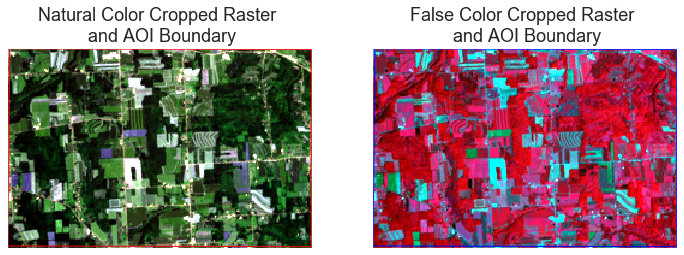

In [69]:
cropped_array, array_raster_profile = es.stack(band_paths_list, nodata=-9999)
crop_extent = plotting_extent(
    cropped_array[0], array_raster_profile["transform"]
)


# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Natural Color
aoi_proj.plot(ax=ax1, facecolor='none', edgecolor='red')
ep.plot_rgb(
    cropped_array,
    ax=ax1,
    stretch=True,
    extent=crop_extent,
    title="Natural Color Cropped Raster \n and AOI Boundary",
)

# False color
aoi_proj.plot(ax=ax2, facecolor='none', edgecolor='blue')
ep.plot_rgb(
    cropped_array,
    ax=ax2,
    rgb=[3, 2, 1],
    stretch=True,
    extent=crop_extent,
    title="False Color Cropped Raster \n and AOI Boundary",
)

plt.show()

# Raster Mosaic

Raster mosaic can be done easily with the **merge()** function in Rasterio. Here, we will show you how to mosaic four DEM raster and create a seamless raster. 

In [70]:
# List all dem files with glob() function
dirpath= "Data_06/RASTER/DEM/DEM_GP/"
out_fp = "Data_06/RASTER/DEM/DEM_Mosaic.tif"

# Make a search criteria to select the DEM files
search_criteria = "*_DEM*.tif"
q = os.path.join(dirpath, search_criteria)
print(q)

Data_06/RASTER/DEM/DEM_GP/*_DEM*.tif


We will  use  **glob()** fuction to create list all rastetr in  /DEM_GP folder.

In [71]:
# glob function can be used to list files from a directory with specific criteria
dem_fps = glob(q)
dem_fps

['Data_06/RASTER/DEM/DEM_GP\\CO_DEM.tif',
 'Data_06/RASTER/DEM/DEM_GP\\KS_DEM.tif',
 'Data_06/RASTER/DEM/DEM_GP\\NM_DEM.tif',
 'Data_06/RASTER/DEM/DEM_GP\\WY_DEM.tif']

Let’s first create an empty list for the datafiles that will be part of the mosaic.

In [72]:
# List for the source files
src_files_to_mosaic = []

# Iterate over raster files and add them to source -list in 'read mode'
for fp in dem_fps:
    src = rio.open(fp)
    src_files_to_mosaic.append(src)

src_files_to_mosaic


[<open DatasetReader name='Data_06/RASTER/DEM/DEM_GP\CO_DEM.tif' mode='r'>,
 <open DatasetReader name='Data_06/RASTER/DEM/DEM_GP\KS_DEM.tif' mode='r'>,
 <open DatasetReader name='Data_06/RASTER/DEM/DEM_GP\NM_DEM.tif' mode='r'>,
 <open DatasetReader name='Data_06/RASTER/DEM/DEM_GP\WY_DEM.tif' mode='r'>]

Let’s plot them next to each other to see how they look like

C:\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:443: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)


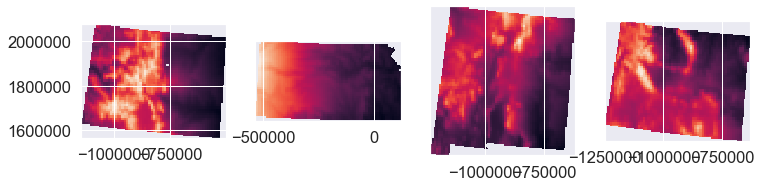

In [73]:
# Create 4 plots next to each other

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(src_files_to_mosaic[0], ax=ax1)
show(src_files_to_mosaic[1], ax=ax2)
show(src_files_to_mosaic[2], ax=ax3)
show(src_files_to_mosaic[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)

As we can see we have multiple separate raster files that are actually located next to each other. Hence, we want to put them together into a single raster file that can by done by creating a raster mosaic.

Now as we have placed the individual raster files in read -mode into the source_files_to_mosaic -list, it is really easy to merge those together and create a mosaic with rasterio’s **merge** function:

We will use **merge()** function to create a mosaic raster, Merge function returns a single mosaic array and the transformation info


In [74]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files_to_mosaic)

Let’s first update the metadata with new dimensions, transform and CRS:

In [75]:
# Copy the metadata
out_meta = src.meta.copy()

new_crs={'init': 'epsg:5070'} 

# Update the metadata
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans,
                 "crs": new_crs
                 }
                )


we can write  mosaic DEM as geo-tif format

In [76]:
# Write the mosaic raster to disk
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)

Now we will load and plot newly created raster again

In [77]:
mosaic_dem_fp = "Data_06/RASTER/DEM/DEM_Mosaic.tif"
MOSAIC_DEM=rio.open(mosaic_dem_fp)

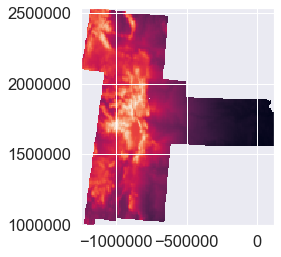

In [78]:
show(MOSAIC_DEM)

# Re-classification

Reclassification is the process of reassigning a value, a range of values, or a list of values in a raster to new output values.


In [79]:
# Open data and assign negative values to nan
with rio.open('Data_06/RASTER/DEM/CO_DEM.tif') as src:
 co_dem_im = src.read(1, masked=True)

# View object dimensions
co_dem_im.shape

(102, 130)

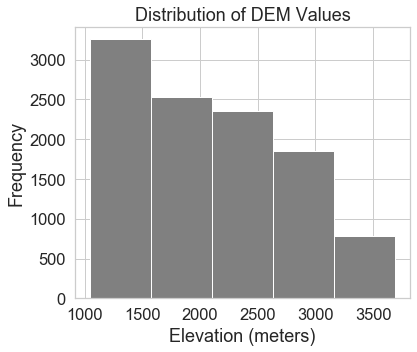

In [80]:
# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

# Histogram 
ep.hist(co_dem_im, colors=['grey'],
        figsize=(6,5),
        title="Distribution of DEM Values",
        xlabel='Elevation (meters)',
        ylabel='Frequency',
        bins=5)
plt.show()


In [81]:
# View min and max values in the data
print('DEM min value:', co_dem_im.min())
print('DEM max value:', co_dem_im.max())

DEM min value: 1048.38
DEM max value: 3688.66


In [82]:
xlim=[1000, 4000]
counts, bins = np.histogram(co_dem_im,
                            bins=3, range=xlim)

In [83]:
# Print histogram outputs
print("counts:", counts)
print("bins:", bins)

counts: [5309 4240 1228]
bins: [1000. 2000. 3000. 4000.]


### Histogram with Custom Breaks

Next, customize your histogram with breaks that you think might make sense as breaks to use for your raster map. in the example below, breaks are added in 1000 meter increments using the bins = argument.

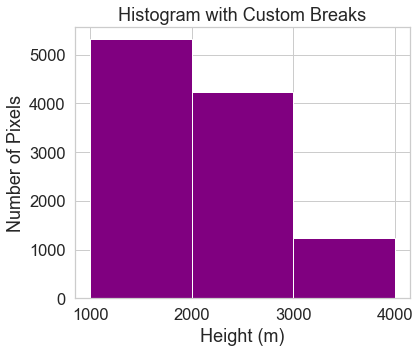

In [84]:
ep.hist(co_dem_im.ravel(),
        figsize=(6,5),
        bins=[1000, 2000, 3000, 4000],
        title="Histogram with Custom Breaks",
        xlabel="Height (m)", ylabel="Number of Pixels")
plt.show()


In [85]:
# Define bins that you want, and then classify the data
class_bins =[co_dem_im.min(), 2000, 3000,  np.inf]

**np.digitize**

Numpy has a function called digitize that is useful for classifying the values in an array. It is similar to how histogram works, because it categorizes datapoints into bins. However, unlike histogram, it doesn’t aggregate/count the number of values within each bin.

In [86]:
# You'll classify the original image array, then unravel it again for plotting
co_dem_im_class = np.digitize(co_dem_im, class_bins)

In [87]:
# Note that you have an extra class in the data (0)
print(np.unique(co_dem_im_class))

[0 1 2 3]


In [88]:
type(co_dem_im_class)

numpy.ndarray

After running the classification we have one extra class. This class - the first class - is your missing data value. Our classified array output is also a regular (not a masked) array. We can reassign the first class in our data to a mask using **np.ma.masked_where()**.

Reassign all values that are classified as 0 to masked (no data value), This will prevent pixels that == 0 from being rendered on a map in matplotlib.

In [89]:
co_dem_class_ma = np.ma.masked_where(co_dem_im_class == 0,
                                        co_dem_im_class,
                                        copy=True)
co_dem_class_ma

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=999999,
  dtype=int64)

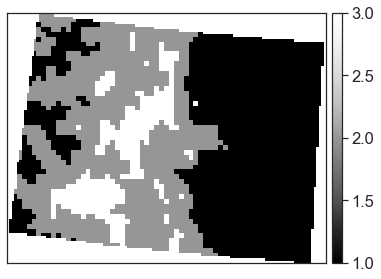

In [90]:
# A cleaner seaborn style for raster plots
sns.set_style("white")

# Plot newly classified and masked raster
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(co_dem_class_ma,
               ax=ax,
               scale=False)
plt.show()

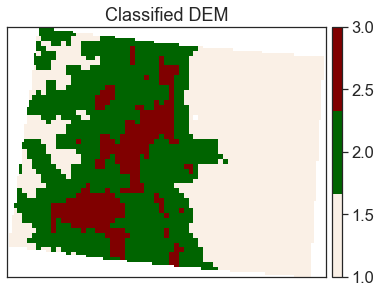

In [91]:
# Plot data using nicer colors
colors = ['linen', 'darkgreen', 'maroon']

cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, len(colors))

fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(co_dem_class_ma,
              cmap=cmap,
              title="Classified DEM",
              scale=False,
             ax=ax)
plt.show()


### Add Custom Legend

The plot looks OK but the legend doesn’t represent the data well. The legend is continuous - with a range between 0 and 3. However you want to plot the data using discrete bins.

Finally, clean up our plot legend. Given you have discrete values you will create a CUSTOM legend with the 3 categories that you created in our classification matrix.

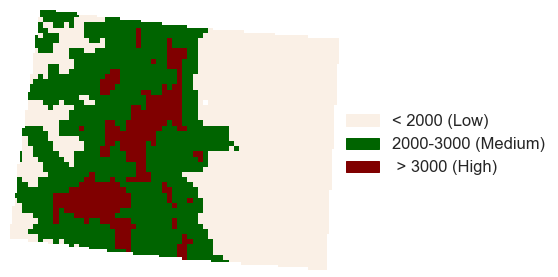

In [92]:
# Create a list of labels to use for your legend
height_class_labels = ["< 2000 (Low)", "2000-3000 (Medium)", " > 3000 (High)"]

# A path is an object drawn by matplotlib. In this case a patch is a box draw on your legend
# Below you create a unique path or box with a unique color - one for each of the labels above
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(colors, height_class_labels)]

cmap = ListedColormap(colors)

fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(co_dem_class_ma,
              cmap=cmap,
              ax=ax,
              cbar=False)
ax.legend(handles=legend_patches,
          facecolor="white",
          edgecolor="white",
          bbox_to_anchor=(1.65, 0.65))  # Place legend to the RIGHT of the map
ax.set_axis_off()



# Zonal Statistics

We can calculate statistic for each zone defined by a zone or polygon dataset, based on values from another dataset (a value raster). A single output value is computed for every zone in the input zone dataset.

In this excercise we will use **zonal_stats()** function of **rasterstats** to county level statistics of DEM data of 4 States of th Great Plain region. 

#### Load & plot the histogram of data

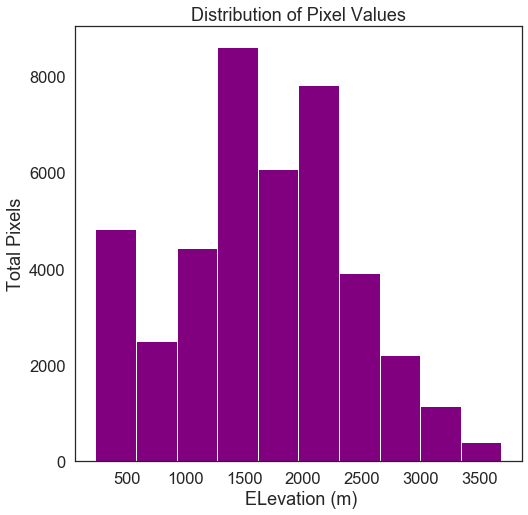

In [93]:
with rio.open('Data_06/RASTER/DEM/DEM.tif') as DEM_src:
    DEM_data = DEM_src.read(1, masked=True)
    DEM_meta = DEM_src.profile

fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(DEM_data.ravel(),
        color="purple"
        )
ax.set(xlabel=" ELevation (m)",
       ylabel="Total Pixels",
       title="Distribution of Pixel Values")

# Turn off scientific notation
ax.ticklabel_format(useOffset=False,
                    style='plain')

#### View summary statistics of DEM data

In [94]:
print('Mean:', DEM_data.mean())
print('Max:', DEM_data.max())
print('Min:', DEM_data.min())

Mean: 1655.7491834155878
Max: 3688.66
Min: 230.455


#### Remove nans, flatten the data 

In [95]:
DEM_data_no_na = DEM_data[~np.isnan(DEM_data)].ravel()

#### Load County boundary file

In [96]:
fp_county="Data_06/GP_county.shp"
county_BD= gpd.GeoDataFrame.from_file(fp_county)
county_BD.geom_type.head()

0    Polygon
1    Polygon
2    Polygon
3    Polygon
4    Polygon
dtype: object

#### Overlay county polygon on top of  DEM data

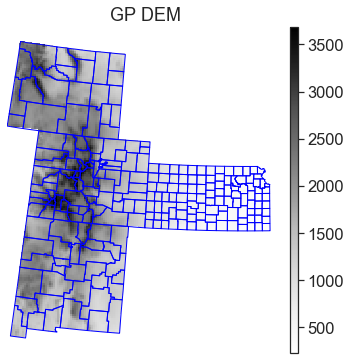

In [97]:
fig, ax = plt.subplots(figsize=(6, 6))

ep.plot_bands(DEM_data,
              # Here you must set the spatial extent or else the data will not line up with your geopandas layer
              extent=plotting_extent(DEM_src),
              cmap='Greys',
              title="GP DEM",
              scale=False,
              ax=ax)
county_BD.plot(ax=ax,
               edgecolor='blue',
              facecolor='none')
ax.set_axis_off()
plt.show()

####  Extract zonal stats
ow we can summary statistic  all of the pixels that fall within each county using the function **zonal_stats()** in the **rasterstats** library.

In [98]:
county_stat = rs.zonal_stats(county_BD,
                                   DEM_data,
                                   nodata=-999,
                                   affine=DEM_meta['transform'],
                                   geojson_out=True,
                                   copy_properties=True,
                                   stats="min mean max median")

In [99]:
# View object type
type(county_stat)

list

####  Turn extracted data into a geo-pandas dataframe

In [100]:
county_stat_gdf = gpd.GeoDataFrame.from_features(county_stat)

####  Write as ESRI Shape files

In [101]:
county_stat_gdf.to_file("Data_06/County_mean.shp")

####  Create a Pandas fram and save as  CSV file

In [102]:
# Write as CSV files
county_stat_df = pd.DataFrame(county_stat_gdf.drop(columns='geometry'))
county_stat_df.to_csv("Data_06/County_mean.csv")
county_stat_df.head()

,FIPS,county,state,x,y,min,max,mean,median
0,35028.0,Los Alamos County,NM,-9.205551e+05,1474062.756,1988.209961,2753.520020,2328.693319,2342.775024
1,20151.0,Pratt County,KS,-2.393597e+05,1626824.340,538.994019,641.210999,591.080688,586.116028
2,20039.0,Decatur County,KS,-3.783594e+05,1871727.422,749.903015,891.192993,815.778374,815.340027
3,35006.0,Cibola County,NM,-1.084544e+06,1385659.523,1724.449951,2630.840088,2162.169234,2188.830078
4,20097.0,Kiowa County,KS,-2.874536e+05,1618321.265,588.257996,718.697998,672.204556,676.591980


####  Plot Median DEM

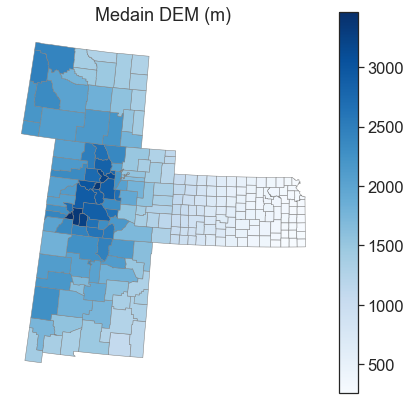

In [103]:
fig, ax = plt.subplots(1, figsize=(7, 7))
county_stat_gdf.plot(column='median', 
                 edgecolor="gray", 
                 ax=ax,
                 cmap='Blues',
                 linewidth=0.5
                  )
ax.set_title("Medain DEM (m)");
ax.axis('off');
fig.colorbar(ax.collections[0], ax=ax)

# Resampling

Resampling refers to changing the cell values due to changes in the raster cell grid. This can occur during reprojection. Even if the projection is not changing, we may want to change the effective cell size of an existing dataset.


#### Load  DEM data

In [104]:
with rio.open('Data_06/RASTER/DEM/CO_DEM.tif') as DEM_src:
    DEM_data = DEM_src.read(1, masked=True)
    DEM_meta = DEM_src.profile

In [105]:
gt = DEM_meta["transform"]
pixelSizeX = gt[0]
pixelSizeY =-gt[4]
print(pixelSizeX)
print(pixelSizeY)

5000.0
5000.0


## Upsampling

**Upsampling** refers to cases where we are converting to higher resolution/smaller cells. We will use **gdal.GRA_Bilinear** of  **gdal.Wrap()** to create 2.5 x 2.5 raster. 

#### Check raster resolution 

In [106]:
inDs = gdal.Open('Data_06/RASTER/DEM/CO_DEM.tif')

dem_25=gdal.Warp('Data_06/RASTER/DEM/CO_DEM_25km.tif', inDs,
                  format = 'GTiff',
                  xRes = 2500, yRes = 2500,
                  resampleAlg = gdal.GRA_Bilinear)

#### Check raster resolution

In [107]:
gt_25 =dem_25.GetGeoTransform()
print (gt_25)

(-1150354.7984626968, 2500.0, 0.0, 2076812.7705312967, 0.0, -2500.0)


In [108]:
pixelSizeX = gt_25[1]
pixelSizeY = -gt_25[5]
print(pixelSizeX)
print(pixelSizeY)

2500.0
2500.0


## Aggregation or Downsampling

Aggregate or downscaling creates a new Raster-layer with a lower resolution (larger cells). Aggregation groups rectangular areas to create larger cells. The value for the resulting cells is computed with a user-specified function. We will create 10 km x 10 km raster from 5 km x 5 kg raster using **gdal.GRA_Average** of  **gdal.Wrap()**. 

In [109]:
dem_10=gdal.Warp('Data_06/RASTER/DEM/CO_DEM_10km.tif', inDs,
                  format = 'GTiff',
                  xRes = 10000, yRes = 10000,
                  resampleAlg = gdal.GRA_Bilinear)


#### Check resolution

In [110]:
gt_10 =dem_10.GetGeoTransform()
print (gt_10)

(-1150354.7984626968, 10000.0, 0.0, 2076812.7705312967, 0.0, -10000.0)


In [111]:
pixelSizeX = gt_10[1]
pixelSizeY = -gt_10[5]
print(pixelSizeX)
print(pixelSizeY)

10000.0
10000.0



# Raster Algebra

Raster algebra in Pyhton is a set-based algebra for manipulating a raster object more raster layers (“maps”) of similar dimensions to produce a new raster layer (map) using algebraic operations. 
A simple sample of raster algebra in python is to convert unit of DEM raster from meter to feet (1 m = 3.28084 feet)

In [112]:
with rio.open('Data_06/RASTER/DEM/CO_DEM.tif') as DEM_src:
    DEM_data = DEM_src.read(1, masked=True)
    DEM_meta = DEM_src.profile

In [113]:
dem_feet=DEM_data * 3.28084

C:\anaconda3\envs\tensorflow\lib\site-packages\numpy\ma\core.py:1015: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


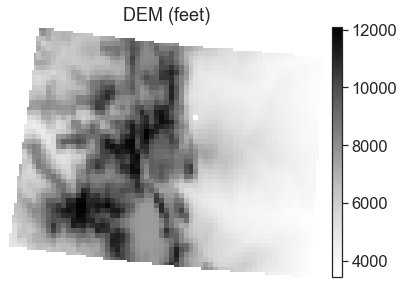

In [114]:
fig, ax = plt.subplots(figsize=(6, 6))

ep.plot_bands(dem_feet,
              cmap='Greys',
              title="DEM (feet)",
              scale=False,
              ax=ax)
ax.set_axis_off()
plt.show()

In [115]:
dem_feet_1000 = dem_feet/1000

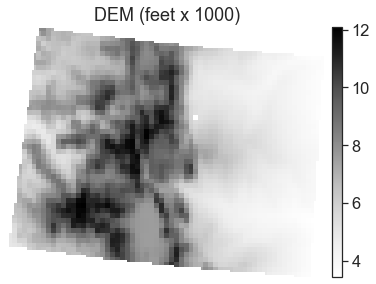

In [116]:
fig, ax = plt.subplots(figsize=(6, 6))

ep.plot_bands(dem_feet_1000,
              cmap='Greys',
              title="DEM (feet x 1000)",
              scale=False,
              ax=ax)
ax.set_axis_off()
plt.show()

We also do some calculations between bands or raster. Here I will show  you how to calculate the normalized difference vegetation index (NDVI) using Landsat 8 data. 

#### Load Red band (band 4)

In [117]:
with rio.open('Data_06/RASTER/LC08_20150706_subset_clip\\LC08_L1TP_015030_20150716_20170226_01_T1_B4_crop.TIF') as red_src:
    red_data = red_src.read(1, masked=True)
    red_meta = red_src.profile

#### Load NIR band (band 5)

In [118]:
with rio.open('Data_06/RASTER/LC08_20150706_subset_clip\\LC08_L1TP_015030_20150716_20170226_01_T1_B5_crop.TIF') as nir_src:
    nir_data = nir_src.read(1, masked=True)
    nir_meta = nir_src.profile

#### Plot multiple bands 

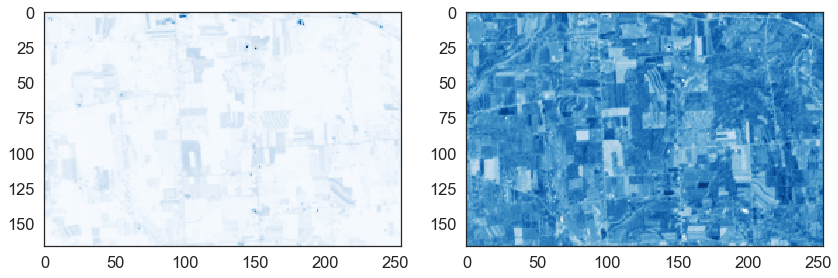

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(red_data, ax=ax1, cmap='Blues') #red
plot.show(nir_data, ax=ax2, cmap='Blues') #nir
plt.tight_layout()

#### Initialize the NDVI with zeros 

In [120]:
ndvi = np.zeros(red_data.shape, dtype=rasterio.float32)

#### Calculate NDVI

In [121]:
ndvi = (nir_data.astype(float)-red_data.astype(float))/(nir_data+red_data)

####  Update meta-data

In [122]:
meta_ndvi = red_meta
meta_ndvi.update(
    dtype=rasterio.float32,
    count=1,
    compress='lzw')

#### Write as GeoTIFF

In [123]:
with rasterio.open('Data_06/RASTER/NDVI/NDVI.tif', 'w', **meta_ndvi) as dst:
    dst.write_band(1, ndvi.astype(rasterio.float32))

#### Plot NDVI

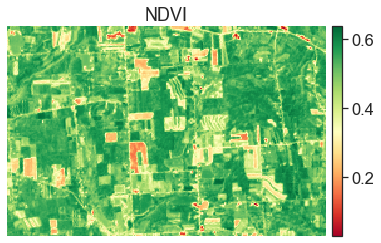

In [124]:
fig, ax = plt.subplots(figsize=(6, 6))

ep.plot_bands(ndvi,
              cmap='RdYlGn',
              title="NDVI",
              scale=False,
              #vmin=-1, vmax=1,
              ax=ax)
ax.set_axis_off()
plt.show()

# Raster Stack

You can use High-level functions to manipulate multiple raster after creating create raster stack (collection of raster layers). 


#### Create a raster list

In [125]:
glist = glob( "Data_06/RASTER/GP_RASTER/*.tif")
glist

['Data_06/RASTER/GP_RASTER\\DEM.tif',
 'Data_06/RASTER/GP_RASTER\\MAP.tif',
 'Data_06/RASTER/GP_RASTER\\MAT.tif',
 'Data_06/RASTER/GP_RASTER\\NDVI.tif',
 'Data_06/RASTER/GP_RASTER\\NLCD.tif',
 'Data_06/RASTER/GP_RASTER\\SLOPE.tif']

#### Read metadata of first file

In [126]:
with rasterio.open(glist[0]) as src0:
    meta = src0.meta

####  Update meta to reflect the number of layers

In [127]:
meta.update(count = len(glist))

#### Read each layer and write it to stack

In [128]:
with rasterio.open('Data_06/RASTER/raster_stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(glist, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

#### Read Raster Stack

In [129]:
with rio.open('Data_06/RASTER/raster_stack.tif') as stack_src:
    stack_data = stack_src.read(masked=True)
    stack_meta = stack_src.profile

#### Check meat data

In [130]:
stack_meta

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 274, 'height': 308, 'count': 6, 'crs': CRS.from_wkt('PROJCS["Albers_Conical_Equal_Area",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(5000.0, 0.0, -1250354.7984626968,
       0.0, -5000.0, 2536812.7705312967), 'tiled': False, 'interleave': 'pixel'}

#### Plot all raster

C:\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:421: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / 0.8)


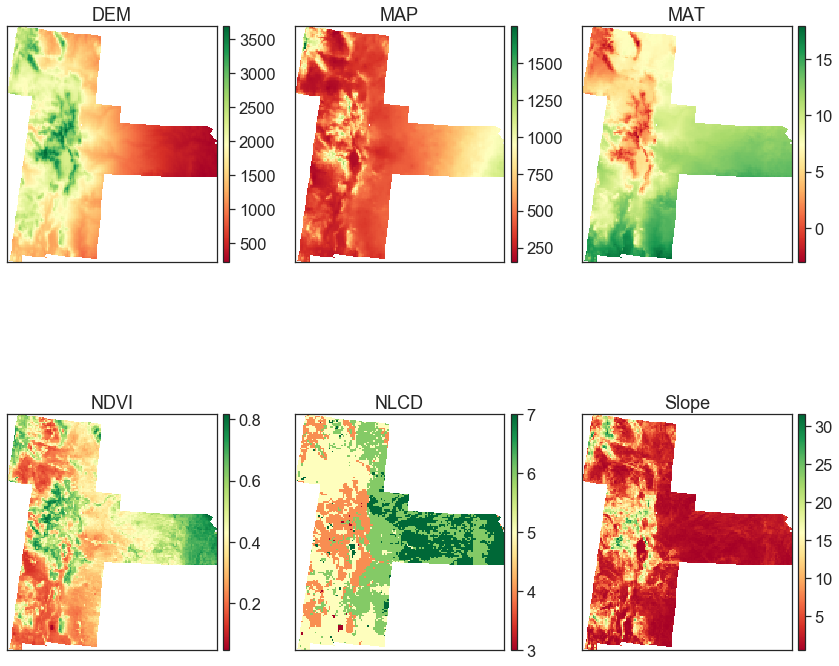

In [131]:
band_titles=['DEM', 'MAP','MAT','NDVI','NLCD','Slope']

ep.plot_bands(stack_data,
              cmap='RdYlGn',
              scale=False,
              title=band_titles)

plt.show()

# Rasterization


we will use **gdal.RasterizeLayer()** from **gdal**.  

## Convert Polygon to Raster

#### Open GP State shape file

In [132]:
shape_poly = 'Data_06/GP_STATE.shp'

#### Load reference raster 

In [133]:
poly_ndsm = 'Data_06/RASTER/GP_RASTER/DEM.tif'
poly_data = gdal.Open(poly_ndsm, gdalconst.GA_ReadOnly)

#### Define raster poperties

In [134]:
poly_output = 'Data_06/GP_BD_grid.tif'

In [135]:
geo_transform = poly_data.GetGeoTransform()
x_min = geo_transform[0]
y_max = geo_transform[3]
x_max = x_min + geo_transform[1] * poly_data.RasterXSize
y_min = y_max + geo_transform[5] * poly_data.RasterYSize
x_res = poly_data.RasterXSize
y_res = poly_data.RasterYSize
mb_v = ogr.Open(shape_poly)
mb_l = mb_v.GetLayer()
pixel_width = geo_transform[1]

#### Rasterize

In [136]:
target_ds = gdal.GetDriverByName('GTiff').Create(poly_output, x_res, y_res, 1, gdal.GDT_Int16)
target_ds.SetGeoTransform((x_min, pixel_width, 0, y_min, 0, pixel_width))
band = target_ds.GetRasterBand(1)
band.FlushCache()
gdal.RasterizeLayer(target_ds, [1], mb_l, options=["ATTRIBUTE=STATE_ID"])

target_ds = None

#### Load the raster

In [137]:
grid_raster = 'Data_06/GP_BD_grid.tif'
grid = gr.from_file(grid_raster)

#### Convert to panda data frame

In [138]:
grid_df = grid.to_pandas()
grid_df.head()

,row,col,value,x,y
0,0,0,0,-1.250355e+06,996812.770531
1,0,1,0,-1.245355e+06,996812.770531
2,0,2,0,-1.240355e+06,996812.770531
3,0,3,0,-1.235355e+06,996812.770531
4,0,4,0,-1.230355e+06,996812.770531


In [139]:
columns =['row','col' ]
grid_df = pd.DataFrame(grid_df.drop(columns=columns))
grid_df.rename(columns = {'value':'STATE_ID'}, inplace = True) 
grid_df = grid_df[grid_df['STATE_ID'] > 0]
grid_df=grid_df[['STATE_ID','x','y']] # organize column


In [140]:
grid_df

,STATE_ID,x,y
8,35,-1.210355e+06,9.968128e+05
9,35,-1.205355e+06,9.968128e+05
10,35,-1.200355e+06,9.968128e+05
11,35,-1.195355e+06,9.968128e+05
12,35,-1.190355e+06,9.968128e+05
...,...,...,...
84132,56,-1.180355e+06,2.531813e+06
84133,56,-1.175355e+06,2.531813e+06
84134,56,-1.170355e+06,2.531813e+06
84135,56,-1.165355e+06,2.531813e+06


In [141]:
grid_df.to_csv ('Data_06/gp_grid.csv', index = None, header=True) 

# Convert Point Data to Raster

#### Load point shape file

In [142]:
shape_point = 'Data_06/RASTER/NDVI/NDVI.shp'

#### Load reference raster 

In [143]:
point_ndsm = 'Data_06/RASTER/NDVI/NDVI.tif'
point_data = gdal.Open(point_ndsm, gdalconst.GA_ReadOnly)

####  Define  raster poperties

In [144]:
point_output = 'Data_06/RASTER/NDVI/NEW_NDVI.tif'

In [145]:
geo_transform = point_data.GetGeoTransform()
x_min = geo_transform[0]
y_max = geo_transform[3]
x_max = x_min + geo_transform[1] * point_data.RasterXSize
y_min = y_max + geo_transform[5] * point_data.RasterYSize
x_res = point_data.RasterXSize
y_res = point_data.RasterYSize
mb_v = ogr.Open(shape_point)
mb_l = mb_v.GetLayer()
pixel_width = geo_transform[1]

#### Rasterize

In [146]:
target_ds = gdal.GetDriverByName('GTiff').Create(point_output, x_res, y_res, 1, gdal.GDT_Float32)
target_ds.SetGeoTransform((x_min, pixel_width, 0, y_min, 0, pixel_width))
band = target_ds.GetRasterBand(1)
band.FlushCache()
gdal.RasterizeLayer(target_ds, [1], mb_l, options=["ATTRIBUTE=NDVI"])

target_ds = None

#### Plot Raster Map

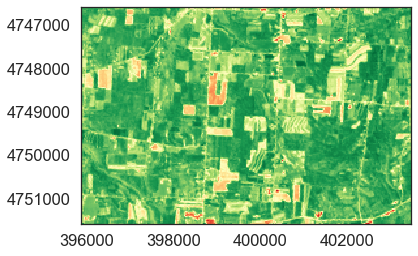

In [147]:
fp = 'Data_06/RASTER/NDVI/NEW_NDVI.tif'
new_ndvi = rio.open(fp)
show(new_ndvi,cmap='RdYlGn')

In [148]:
new_ndvi.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 254,
 'height': 167,
 'count': 1,
 'crs': None,
 'transform': Affine(30.0, 0.0, 395865.0,
        0.0, 30.0, 4746585.0)}

# Convert Raster to Point Data

For convert raster data to spatial point data frame, we will use **.to_pandas()**  function of **GeoRasters** package.  

#### Load data

In [149]:
single_raster = 'Data_06/RASTER/GP_RASTER/DEM.tif'
single_data = gr.from_file(single_raster)

In [150]:
# Get some stats
single_data.mean()

1655.7491834155878

#### Convert to Pandas DataFrame

In [151]:
single_df = single_data.to_pandas()

In [152]:
single_df.head()

,row,col,value,x,y
0,0,14,2482.820068,-1.180355e+06,2.536813e+06
1,0,15,2482.820068,-1.175355e+06,2.536813e+06
2,0,16,2693.919922,-1.170355e+06,2.536813e+06
3,0,17,2693.919922,-1.165355e+06,2.536813e+06
4,0,18,2214.010010,-1.160355e+06,2.536813e+06


#### Drop some columns 

In [153]:
columns =['row','col' ]
single_df = pd.DataFrame(single_df.drop(columns=columns))
single_df.rename(columns = {'value':'DEM'}, inplace = True) 
single_df=single_df[['x','y','DEM']] # organize column
single_df.head()

,x,y,DEM
0,-1.180355e+06,2.536813e+06,2482.820068
1,-1.175355e+06,2.536813e+06,2482.820068
2,-1.170355e+06,2.536813e+06,2693.919922
3,-1.165355e+06,2.536813e+06,2693.919922
4,-1.160355e+06,2.536813e+06,2214.010010


#### Write as CSV file

In [154]:
single_df.to_csv ('Data_06/RASTER/gp_grid_dem.csv', index = None, header=True) 

#### Convert PD data-frame to Geopandas data frame

In [155]:
single_df_point = gpd.GeoDataFrame(
    single_df, geometry=gpd.points_from_xy(single_df.x,single_df.y))

#### Define projection

In [156]:
single_df_point.crs = {'init' :'epsg:32618'}

#### Writes as point shape file

In [157]:
single_df_point.to_file("Data_06/dem_point.shp")

# Extract Raster Values to Sampling Points

## Extract Single Band Raster

We will extract raster values to SPDF data frame the Characterize the sampling locations with a comprehensive set of environmental data. 

In [158]:
values = pd.Series()

inputShape= 'Data_06/GP_POINT_SOC.shp'
inputRaster ='Data_06/RASTER/GP_RASTER/DEM.tif'

# Read input shapefile with fiona and iterate over each feature
with fiona.open(inputShape) as shp:
    for feature in shp:
        siteID = feature['properties']['SiteID']
        coords = feature['geometry']['coordinates']
        # Read pixel value at the given coordinates using Rasterio
        # NB: `sample()` returns an iterable of ndarrays.
        with rio.open(inputRaster) as src:
            value = [v for v in src.sample([coords])][0][0]
        # Update the pandas serie accordingly
        values.loc[siteID] = value

In [159]:
values

1      1551.130005
2      2308.689941
3      1689.930054
4      1822.170044
5      1758.680054
          ...     
566    1296.369995
567    1296.369995
568    1296.369995
569    1286.000000
570    1417.859985
Length: 570, dtype: float64

In [160]:
df = pd.DataFrame(values)
df.columns = ['DEM']
df.index.name = 'SiteID'

In [161]:
df.head()

,DEM
SiteID,
1,1551.130005
2,2308.689941
3,1689.930054
4,1822.170044
5,1758.680054


In [162]:
# Write records into a CSV file
df.to_csv('Data_06/GP_DEM.csv', header =True)

## Extract Multi-band raster (raster stack) 

In [163]:
multi_values_points = pd.Series()

inputShape= 'Data_06/GP_POINT_SOC.shp'

# Read input shapefile with fiona and iterate over each feature
with fiona.open(inputShape) as shp:
    for feature in shp:
        siteID = feature['properties']['SiteID']
        coords = feature['geometry']['coordinates']
        # Read pixel value at the given coordinates using Rasterio
        # NB: `sample()` returns an iterable of ndarrays.
        with rio.open('Data_06/RASTER/raster_stack.tif') as stack_src:
                  value = [v for v in stack_src.sample([coords])]
        # Update the pandas serie accordingly
        multi_values_points.loc[siteID] = value


In [164]:
multi_values_points

1      [[1551.13, 384.401, 9.79839, 0.331707, 7.0, 1....
2      [[2308.69, 194.282, 5.36274, 0.430466, 7.0, 0....
3      [[1689.93, 469.255, 10.055, 0.471263, 6.0, 2.9...
4      [[1822.17, 470.238, 9.39621, 0.396961, 6.0, 2....
5      [[1758.68, 439.722, 9.52607, 0.348821, 6.0, 1....
                             ...                        
566    [[1296.37, 315.881, 7.58175, 0.345824, 6.0, 2....
567    [[1296.37, 315.881, 7.58175, 0.345824, 6.0, 2....
568    [[1296.37, 315.881, 7.58175, 0.345824, 6.0, 2....
569    [[1286.0, 331.578, 7.55435, 0.352597, 6.0, 2.3...
570    [[1417.86, 434.79, 6.45444, 0.489789, 5.0, 4.0...
Length: 570, dtype: object

In [165]:
df1 = pd.DataFrame(multi_values_points.values.tolist(), index=multi_values_points.index)
df1['SiteID'] = df1.index
df1

,0,SiteID
1,"[1551.13, 384.401, 9.79839, 0.331707, 7.0, 1.3...",1
2,"[2308.69, 194.282, 5.36274, 0.430466, 7.0, 0.8...",2
3,"[1689.93, 469.255, 10.055, 0.471263, 6.0, 2.96...",3
4,"[1822.17, 470.238, 9.39621, 0.396961, 6.0, 2.7...",4
5,"[1758.68, 439.722, 9.52607, 0.348821, 6.0, 1.7...",5
...,...,...
566,"[1296.37, 315.881, 7.58175, 0.345824, 6.0, 2.5...",566
567,"[1296.37, 315.881, 7.58175, 0.345824, 6.0, 2.5...",567
568,"[1296.37, 315.881, 7.58175, 0.345824, 6.0, 2.5...",568
569,"[1286.0, 331.578, 7.55435, 0.352597, 6.0, 2.30...",569


In [166]:
df2 = pd.DataFrame(df1[0].values.tolist(), 
                   columns=['DEM','MAP','MAT','NDVI','NLCD','Slope'])
df2.head()

,DEM,MAP,MAT,NDVI,NLCD,Slope
0,1551.130005,384.401001,9.79839,0.331707,7.0,1.30141
1,2308.689941,194.281998,5.36274,0.430466,7.0,0.85811
2,1689.930054,469.255005,10.05500,0.471263,6.0,2.96257
3,1822.170044,470.238007,9.39621,0.396961,6.0,2.71405
4,1758.680054,439.721985,9.52607,0.348821,6.0,1.79807


In [167]:
df2['SiteID'] = df1.index
df2

,DEM,MAP,MAT,NDVI,NLCD,Slope,SiteID
0,1551.130005,384.401001,9.79839,0.331707,7.0,1.30141,1
1,2308.689941,194.281998,5.36274,0.430466,7.0,0.85811,2
2,1689.930054,469.255005,10.05500,0.471263,6.0,2.96257,3
3,1822.170044,470.238007,9.39621,0.396961,6.0,2.71405,4
4,1758.680054,439.721985,9.52607,0.348821,6.0,1.79807,5
...,...,...,...,...,...,...,...
565,1296.369995,315.881012,7.58175,0.345824,6.0,2.50288,566
566,1296.369995,315.881012,7.58175,0.345824,6.0,2.50288,567
567,1296.369995,315.881012,7.58175,0.345824,6.0,2.50288,568
568,1286.000000,331.578003,7.55435,0.352597,6.0,2.30247,569


In [168]:
df3 =df2[['SiteID','DEM','Slope','MAP','MAT','NDVI','NLCD']] # organize column

In [169]:
# Write records into a CSV file
df3.to_csv('Data_06/gp_point_data.csv', header =True, index=False)

# Extract Multi-band raster (raster stack) to Grid Locations

In [170]:
# Read GPS of soil sampling locations
f_grid = 'Data_06/GP_grid.csv'
grid_df = pd.read_csv(f_grid)
grid_df.head()

,STATE_ID,x,y
0,35,-1.210355e+06,996812.770531
1,35,-1.205355e+06,996812.770531
2,35,-1.200355e+06,996812.770531
3,35,-1.195355e+06,996812.770531
4,35,-1.190355e+06,996812.770531


In [171]:
grid_df['GridID']=grid_df.index
grid_df

,STATE_ID,x,y,GridID
0,35,-1.210355e+06,9.968128e+05,0
1,35,-1.205355e+06,9.968128e+05,1
2,35,-1.200355e+06,9.968128e+05,2
3,35,-1.195355e+06,9.968128e+05,3
4,35,-1.190355e+06,9.968128e+05,4
...,...,...,...,...
42008,56,-1.180355e+06,2.531813e+06,42008
42009,56,-1.175355e+06,2.531813e+06,42009
42010,56,-1.170355e+06,2.531813e+06,42010
42011,56,-1.165355e+06,2.531813e+06,42011


In [172]:
grid_point = gpd.GeoDataFrame(
    grid_df, geometry=gpd.points_from_xy(grid_df.x, grid_df.y))
grid_point.to_file('Data_06/gp_grid.shp')

In [173]:
multi_values_grid = pd.Series()

inputGrid= 'Data_06/gp_grid.shp'

# Read input shapefile with fiona and iterate over each feature
with fiona.open(inputGrid) as shp:
    for feature in shp:
        gridID = feature['properties']['GridID']
        coords = feature['geometry']['coordinates']
        # Read pixel value at the given coordinates using Rasterio
        # NB: `sample()` returns an iterable of ndarrays.
        with rio.open('Data_06/RASTER/raster_stack.tif') as stack_src:
                  value = [v for v in stack_src.sample([coords])]
        # Update the pandas serie accordingly
        multi_values_grid.loc[gridID] = value
 

In [174]:
mf1 = pd.DataFrame(multi_values_grid.values.tolist(), index=multi_values_grid.index)
mf1['GridID'] = mf1.index
mf1

,0,GridID
0,"[-3.4028234663852886e+38, -3.4028234663852886e...",0
1,"[-3.4028234663852886e+38, -3.4028234663852886e...",1
2,"[-3.4028234663852886e+38, -3.4028234663852886e...",2
3,"[-3.4028234663852886e+38, -3.4028234663852886e...",3
4,"[-3.4028234663852886e+38, -3.4028234663852886e...",4
...,...,...
42008,"[2482.82, 1091.21, 1.42739, 0.594469, 5.0, 10....",42008
42009,"[2482.82, 1091.21, 1.42739, 0.594469, 5.0, 10....",42009
42010,"[2693.92, 1066.5, 0.205696, 0.540465, 4.0, 15....",42010
42011,"[2693.92, 1066.5, 0.205696, 0.540465, 4.0, 15....",42011


In [175]:
mf2 = pd.DataFrame(mf1[0].values.tolist(), 
                   columns=['DEM','MAP','MAT','NDVI','NLCD','Slope'])
mf2

,DEM,MAP,MAT,NDVI,NLCD,Slope
0,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
1,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
2,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
3,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
4,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
...,...,...,...,...,...,...
42008,2.482820e+03,1.091210e+03,1.427390e+00,5.944690e-01,5.000000e+00,1.074880e+01
42009,2.482820e+03,1.091210e+03,1.427390e+00,5.944690e-01,5.000000e+00,1.074880e+01
42010,2.693920e+03,1.066500e+03,2.056960e-01,5.404650e-01,4.000000e+00,1.565970e+01
42011,2.693920e+03,1.066500e+03,2.056960e-01,5.404650e-01,4.000000e+00,1.565970e+01


In [176]:
mf2['GridID'] = mf1.index
mf2['x'] = grid_df['x']
mf2['y'] = grid_df['y']
mf2

,DEM,MAP,MAT,NDVI,NLCD,Slope,GridID,x,y
0,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,0,-1.210355e+06,9.968128e+05
1,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,1,-1.205355e+06,9.968128e+05
2,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,2,-1.200355e+06,9.968128e+05
3,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,3,-1.195355e+06,9.968128e+05
4,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,4,-1.190355e+06,9.968128e+05
...,...,...,...,...,...,...,...,...,...
42008,2.482820e+03,1.091210e+03,1.427390e+00,5.944690e-01,5.000000e+00,1.074880e+01,42008,-1.180355e+06,2.531813e+06
42009,2.482820e+03,1.091210e+03,1.427390e+00,5.944690e-01,5.000000e+00,1.074880e+01,42009,-1.175355e+06,2.531813e+06
42010,2.693920e+03,1.066500e+03,2.056960e-01,5.404650e-01,4.000000e+00,1.565970e+01,42010,-1.170355e+06,2.531813e+06
42011,2.693920e+03,1.066500e+03,2.056960e-01,5.404650e-01,4.000000e+00,1.565970e+01,42011,-1.165355e+06,2.531813e+06


In [177]:
mf2 = mf2[mf2['NLCD'] > 0]
mf2

,DEM,MAP,MAT,NDVI,NLCD,Slope,GridID,x,y
16,1670.989990,453.648987,14.284800,0.288304,5.0,7.23222,16,-1.210355e+06,1.001813e+06
17,1670.989990,453.648987,14.284800,0.288304,5.0,7.23222,17,-1.205355e+06,1.001813e+06
18,1563.839966,402.542999,14.935900,0.245139,5.0,4.70358,18,-1.200355e+06,1.001813e+06
19,1563.839966,402.542999,14.935900,0.245139,5.0,4.70358,19,-1.195355e+06,1.001813e+06
20,1428.630005,348.114990,15.657900,0.218998,6.0,2.02707,20,-1.190355e+06,1.001813e+06
...,...,...,...,...,...,...,...,...,...
42008,2482.820068,1091.209961,1.427390,0.594469,5.0,10.74880,42008,-1.180355e+06,2.531813e+06
42009,2482.820068,1091.209961,1.427390,0.594469,5.0,10.74880,42009,-1.175355e+06,2.531813e+06
42010,2693.919922,1066.500000,0.205696,0.540465,4.0,15.65970,42010,-1.170355e+06,2.531813e+06
42011,2693.919922,1066.500000,0.205696,0.540465,4.0,15.65970,42011,-1.165355e+06,2.531813e+06


In [178]:
mf3 =mf2[['GridID','x','y','DEM','Slope','MAP','MAT','NDVI','NLCD']] # organize column

In [179]:
# Write records into a CSV file
mf3.to_csv('Data_06/gp_grid_data.csv', header =True, index=False)

#### Sources:

http://geologyandpython.com/dem-processing.html 

https://automating-gis-processes.github.io/CSC/notebooks/L4/spatial-join.html 

https://geohackweek.github.io/raster/04-workingwithrasters/

https://www.earthdatascience.org/workshops/gis-open-source-python/subtract-rasters-in-open-source-python/ 

https://www.e-education.psu.edu/geog489/node/2215 

https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/customize-matplotlib-raster-maps/ 

https://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html 

https://automating-gis-processes.github.io/2016/Lesson7-read-raster.html https://www.neonscience.org/plot-neon-rgb-py 

https://www.earthdatascience.org/courses/earth-analytics-python/multispectral-remote-sensing-in-python/naip-imagery-raster-stacks-in-python/ 